# Explore Cluster structure using OPTICS algorithm - SKU
This notebook will explore the final output of an optics clustering. 

In [1]:
import sys 
sys.path.insert(0, 'C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src')
from OPTICS import optics

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
sample_set = 'STEGS'
x_set = 'seasonal'
data_loc = '../Sample_data/' + sample_set +'/pickle/'
figureloc = '/home/colin/Desktop/D_BOM/reports/figures/'

In [3]:
pkl_file = open(data_loc + 'sku_X' + x_set + '.pkl', 'rb')
pc = pickle.load(pkl_file)
pkl_file = open(data_loc + 'sku_Y' + '.pkl', 'rb')
Y = pickle.load(pkl_file)
#pc.drop_duplicates(inplace = True)

In [4]:
Y.head()

,Lines,LooseUOH1Lines,LooseUOH1sperLooseUOH1Lines,FullUOH2Lines,FullUOH2sperFullUOH2Lines,FullUOH3Lines,FullUOH3sperFullUOH3Lines,ShipDate,A,C,M,P,R,1,2,3,4
SKU,,,,,,,,,,,,,,,,,
AAMB004000,0.000000,0.00000,0.000000,1.000000,2.000000,0.000000,0.00000,1,1,0,0,0,0,1.000000,0.000000,0.000000,0.000000
AAMB004002,2.564949,0.00000,0.000000,1.000000,2.846154,0.000000,0.00000,13,1,0,0,0,0,0.076923,0.076923,0.230769,0.615385
AAMB004003,2.079442,0.25000,4.500000,1.000000,2.750000,0.000000,0.00000,8,1,0,0,0,0,0.250000,0.500000,0.250000,0.000000
AAMB004005,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.00000,1,1,0,0,0,0,1.000000,0.000000,0.000000,0.000000
AAMB004012,5.662960,0.03125,2.111111,0.982639,10.734982,0.111111,1.40625,151,1,0,0,0,0,0.496528,0.152778,0.086806,0.263889


pkl_file = open(data_loc +  'sku_weights' + x_set + '.pkl', 'rb')
weights = pickle.load(pkl_file)

In [5]:
pc.describe()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
count,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03
mean,2.301907e-15,2.452673e-16,-1.383704e-16,3.979255e-16,-2.549267e-16,1.964070e-17,-1.212451e-16,-4.024735e-18,-2.028466e-16,-8.218508e-17
std,1.682224e+00,1.526855e+00,1.287127e+00,1.273860e+00,1.126267e+00,1.117453e+00,1.073648e+00,1.012915e+00,9.847675e-01,9.537428e-01
min,-5.030590e+00,-3.772256e+00,-3.419151e+00,-4.373416e+00,-4.239609e+00,-5.290345e+00,-5.939836e+00,-3.195690e+00,-7.781673e+00,-4.507796e+00
25%,-1.158362e+00,-9.794840e-01,-9.794982e-01,-7.128414e-01,-7.513633e-01,-7.040332e-01,-6.695033e-01,-4.482297e-01,-1.971615e-01,-4.372512e-01
50%,-2.993123e-01,-8.102592e-02,-1.426626e-01,-5.624415e-02,-1.271777e-01,-1.496523e-01,8.444582e-02,-6.756489e-02,-2.107708e-02,-1.325119e-02
75%,8.669720e-01,1.015994e+00,7.797280e-01,5.873698e-01,6.600186e-01,6.496796e-01,7.329388e-01,3.325919e-01,1.883058e-01,4.210947e-01
max,5.721806e+00,5.503603e+00,4.651609e+00,5.741645e+00,5.747502e+00,6.864439e+00,6.165626e+00,1.099872e+01,8.044061e+00,9.796633e+00


#Weight the principal components based on their explained variation 
for i, d in enumerate(pc.columns):
    pc[d] = pc[d] * weights[i] / weights.sum()

In [6]:
pc.describe()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
count,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03,5.517000e+03
mean,2.301907e-15,2.452673e-16,-1.383704e-16,3.979255e-16,-2.549267e-16,1.964070e-17,-1.212451e-16,-4.024735e-18,-2.028466e-16,-8.218508e-17
std,1.682224e+00,1.526855e+00,1.287127e+00,1.273860e+00,1.126267e+00,1.117453e+00,1.073648e+00,1.012915e+00,9.847675e-01,9.537428e-01
min,-5.030590e+00,-3.772256e+00,-3.419151e+00,-4.373416e+00,-4.239609e+00,-5.290345e+00,-5.939836e+00,-3.195690e+00,-7.781673e+00,-4.507796e+00
25%,-1.158362e+00,-9.794840e-01,-9.794982e-01,-7.128414e-01,-7.513633e-01,-7.040332e-01,-6.695033e-01,-4.482297e-01,-1.971615e-01,-4.372512e-01
50%,-2.993123e-01,-8.102592e-02,-1.426626e-01,-5.624415e-02,-1.271777e-01,-1.496523e-01,8.444582e-02,-6.756489e-02,-2.107708e-02,-1.325119e-02
75%,8.669720e-01,1.015994e+00,7.797280e-01,5.873698e-01,6.600186e-01,6.496796e-01,7.329388e-01,3.325919e-01,1.883058e-01,4.210947e-01
max,5.721806e+00,5.503603e+00,4.651609e+00,5.741645e+00,5.747502e+00,6.864439e+00,6.165626e+00,1.099872e+01,8.044061e+00,9.796633e+00


In [7]:
Y.head()

,Lines,LooseUOH1Lines,LooseUOH1sperLooseUOH1Lines,FullUOH2Lines,FullUOH2sperFullUOH2Lines,FullUOH3Lines,FullUOH3sperFullUOH3Lines,ShipDate,A,C,M,P,R,1,2,3,4
SKU,,,,,,,,,,,,,,,,,
AAMB004000,0.000000,0.00000,0.000000,1.000000,2.000000,0.000000,0.00000,1,1,0,0,0,0,1.000000,0.000000,0.000000,0.000000
AAMB004002,2.564949,0.00000,0.000000,1.000000,2.846154,0.000000,0.00000,13,1,0,0,0,0,0.076923,0.076923,0.230769,0.615385
AAMB004003,2.079442,0.25000,4.500000,1.000000,2.750000,0.000000,0.00000,8,1,0,0,0,0,0.250000,0.500000,0.250000,0.000000
AAMB004005,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.00000,1,1,0,0,0,0,1.000000,0.000000,0.000000,0.000000
AAMB004012,5.662960,0.03125,2.111111,0.982639,10.734982,0.111111,1.40625,151,1,0,0,0,0,0.496528,0.152778,0.086806,0.263889


In [8]:
clust = optics.OPTICS(min_cluster_size = .03)
X = pc.values
clust.fit(X)


C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r)

C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r)

C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r)

C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r) / self.min_samples
C:/Users/csinclair/Desktop/Misc/DS/DataMining/D_BOM/src\OPTICS\optics.py:474: RuntimeWarning: divide by zero encountered in double_scalars
  self.local_reachability_[i] = 1 / np.sum(r)

OPTICS(algorithm='auto', leaf_size=30, max_eps=inf, maxima_ratio=0.75,
    metric='minkowski', metric_params=None, min_cluster_size=0.03,
    min_maxima_ratio=0.001, min_samples=5, n_jobs=None, p=2,
    rejection_ratio=0.7, significant_min=0.003, similarity_threshold=0.4)

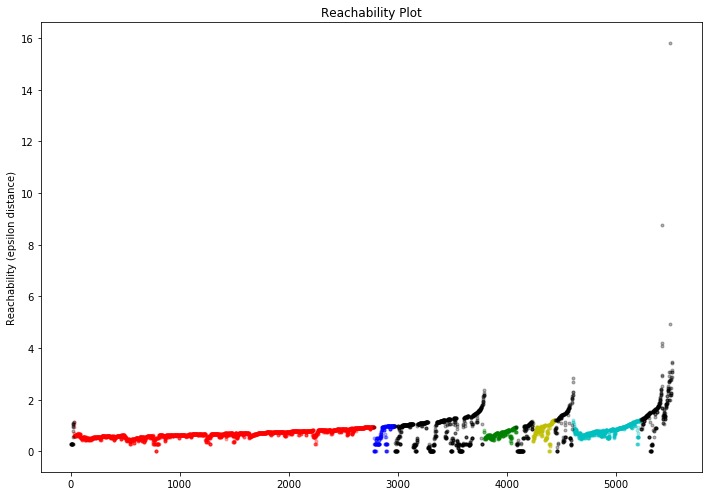

In [9]:
def plot_reach(clust):
    space = np.arange(len(clust.labels_))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]
    plt.figure(figsize=(10, 7))
    ax1 = plt.subplot(111)


    # Reachability plot
    colors = ['r.', 'b.', 'g.', 'y.', 'c.', 'm.']
    for k in range(0, len(np.unique(clust.labels_))):
        col = colors[k%len(colors)]
        Xk = space[labels == k]
        Rk = reachability[labels == k]
        ax1.plot(Xk, Rk, col, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')


    plt.tight_layout()
    #plt.savefig(figureloc + 'Reachability_Clustered.png')
    plt.show()
plot_reach(clust)

In [10]:
clust.reachability_

array([       inf, 1.11910276, 1.02270364, ..., 1.25503217, 2.37689175,
       1.83546238])

In [11]:
#plot noise as gray 
def plot_4D(X, title):
    from mpl_toolkits.mplot3d import Axes3D
    figDBSCAN3D = plt.figure(figsize=(20, 20))
    ax = figDBSCAN3D.add_subplot(111, projection='3d')
    colors = [ 'red', 'blue', 'green', 'yellow',  'purple', 'cyan', 'magenta']
    for i, d in enumerate(np.unique(X.cluster)):
        P = X[X.cluster == d].values
        c = colors[d%len(colors)]
        if d == -1:
            c = 'gray'          
        ax.scatter(P[:, 0], P[:, 1],P[:, 2], c= c ,  alpha = .25)
    ax.set_title(title)
    return ax


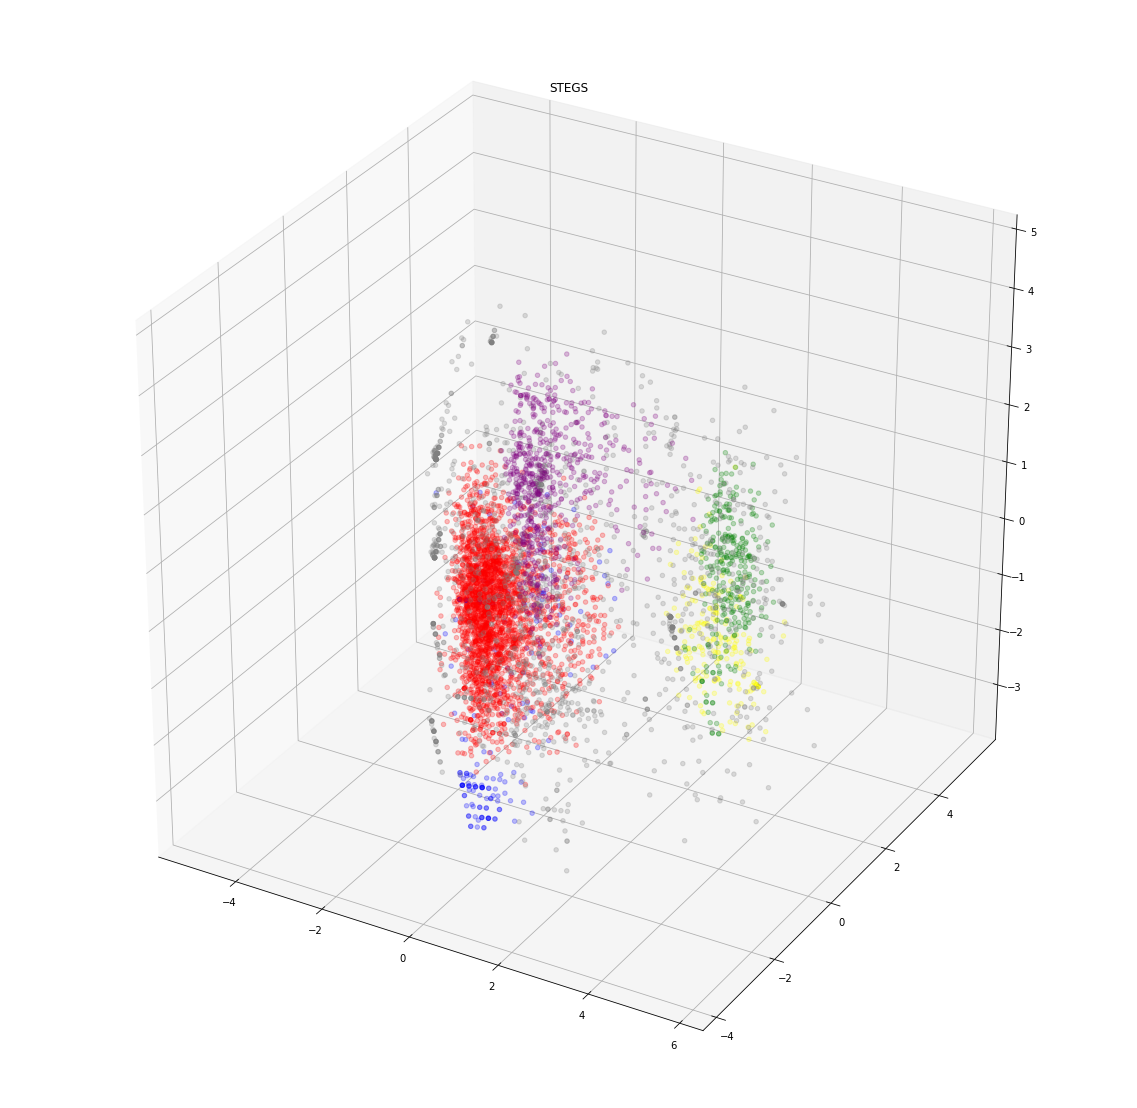

In [12]:
#Tot = np.hstack((X, clust.labels_))
pc['cluster'] = clust.labels_
plot_4D(pc, sample_set)


In [13]:
pc['cluster'].unique()

array([-1,  0,  1,  2,  3,  4], dtype=int64)

In [14]:
Y.describe().T

,count,mean,std,min,25%,50%,75%,max
Lines,5517.0,2.303639,1.678417,0.0,0.693147,2.197225,3.555348,8.048149
LooseUOH1Lines,5517.0,0.440501,0.331917,0.0,0.169231,0.382979,0.666667,1.000000
LooseUOH1sperLooseUOH1Lines,5517.0,2.772236,1.534656,0.0,2.000000,2.941176,3.666667,15.000000
FullUOH2Lines,5517.0,0.527286,0.330158,0.0,0.271605,0.500000,0.818182,1.000000
FullUOH2sperFullUOH2Lines,5517.0,3.951502,2.683575,0.0,2.500000,3.500000,5.111111,17.000000
FullUOH3Lines,5517.0,0.618467,0.344587,0.0,0.387755,0.705882,0.926829,1.000000
FullUOH3sperFullUOH3Lines,5517.0,2.747730,2.987394,0.0,1.000000,2.000000,3.256410,34.000000
ShipDate,5517.0,25.797897,47.017531,1.0,2.000000,7.000000,26.000000,502.000000
A,5517.0,0.687511,0.463550,0.0,0.000000,1.000000,1.000000,1.000000
C,5517.0,0.148450,0.355578,0.0,0.000000,0.000000,0.000000,1.000000


In [15]:
Y[clust.labels_ == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Lines,192.0,1.131175,1.347358,0.0,0.00000,0.693147,1.791759,6.634633
LooseUOH1Lines,192.0,0.649447,0.383446,0.0,0.31716,0.750000,1.000000,1.000000
LooseUOH1sperLooseUOH1Lines,192.0,2.770539,1.674783,0.0,2.00000,2.585714,4.000000,6.000000
FullUOH2Lines,192.0,0.761801,0.311763,0.0,0.50000,1.000000,1.000000,1.000000
FullUOH2sperFullUOH2Lines,192.0,3.380608,1.924569,0.0,2.00000,3.000000,4.666667,11.000000
FullUOH3Lines,192.0,0.304176,0.400087,0.0,0.00000,0.000000,0.723214,1.000000
FullUOH3sperFullUOH3Lines,192.0,1.779368,2.788579,0.0,0.00000,0.000000,2.541667,12.222222
ShipDate,192.0,9.317708,29.849853,1.0,1.00000,2.000000,5.000000,279.000000
A,192.0,1.000000,0.000000,1.0,1.00000,1.000000,1.000000,1.000000
C,192.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000


In [16]:
Y['clust'] = clust.labels_
Y.head()

,Lines,LooseUOH1Lines,LooseUOH1sperLooseUOH1Lines,FullUOH2Lines,FullUOH2sperFullUOH2Lines,FullUOH3Lines,FullUOH3sperFullUOH3Lines,ShipDate,A,C,M,P,R,1,2,3,4,clust
SKU,,,,,,,,,,,,,,,,,,
AAMB004000,0.000000,0.00000,0.000000,1.000000,2.000000,0.000000,0.00000,1,1,0,0,0,0,1.000000,0.000000,0.000000,0.000000,-1
AAMB004002,2.564949,0.00000,0.000000,1.000000,2.846154,0.000000,0.00000,13,1,0,0,0,0,0.076923,0.076923,0.230769,0.615385,-1
AAMB004003,2.079442,0.25000,4.500000,1.000000,2.750000,0.000000,0.00000,8,1,0,0,0,0,0.250000,0.500000,0.250000,0.000000,-1
AAMB004005,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.00000,1,1,0,0,0,0,1.000000,0.000000,0.000000,0.000000,-1
AAMB004012,5.662960,0.03125,2.111111,0.982639,10.734982,0.111111,1.40625,151,1,0,0,0,0,0.496528,0.152778,0.086806,0.263889,-1


In [42]:
df = Y.groupby(by = 'clust').mean()

In [43]:
for col in df.columns:
    df[col] = df[col] / Y[col].mean() - 1

In [44]:
df.head()

,Lines,LooseUOH1Lines,LooseUOH1sperLooseUOH1Lines,FullUOH2Lines,FullUOH2sperFullUOH2Lines,FullUOH3Lines,FullUOH3sperFullUOH3Lines,ShipDate,A,C,M,P,R,1,2,3,4
clust,,,,,,,,,,,,,,,,,
-1,-0.418248,-0.053220,-0.268692,-0.163371,-0.153309,-0.075910,0.164567,-0.507250,-0.150944,0.490242,2.802205,-0.106739,2.802205,-0.124681,0.328286,0.407742,-0.387701
0,0.250380,-0.007292,0.082502,-0.019500,-0.051343,0.049899,-0.048677,0.407187,0.454521,-1.000000,-1.000000,-1.000000,-1.000000,0.153707,-0.194051,-0.370640,0.267196
1,-0.508962,0.474338,-0.000612,0.444758,-0.144475,-0.508178,-0.352423,-0.638819,0.454521,-1.000000,-1.000000,-1.000000,-1.000000,1.126987,-0.193689,-0.466974,-0.407862
2,-0.148707,0.274919,0.301921,0.320209,0.507622,0.095675,0.357253,-0.697518,-1.000000,5.736264,-1.000000,-1.000000,-1.000000,-1.000000,-0.861490,2.885068,-1.000000
3,-0.151892,-0.199140,0.068020,0.475240,0.981981,0.123361,0.032266,-0.627648,-1.000000,5.736264,-1.000000,-1.000000,-1.000000,-1.000000,4.356918,-0.640033,-1.000000


Text(0,0.5,'Num SKU')

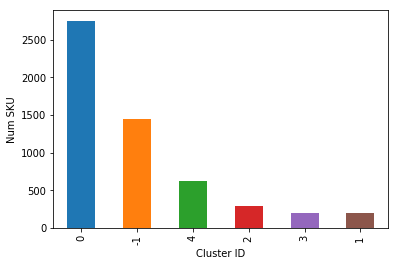

In [45]:
Y['clust'].value_counts().plot(kind = 'bar')
plt.xlabel('Cluster ID')
plt.ylabel('Num SKU')

In [46]:
groupcols = ['A', 'C', 'M', 'P', 'R']
df2 = Y.groupby(by = 'clust')[groupcols].sum()

In [47]:

groupsum = df2[groupcols].sum(axis = 1)
for skutype in groupcols:
    df[skutype] = df2[skutype] / groupsum

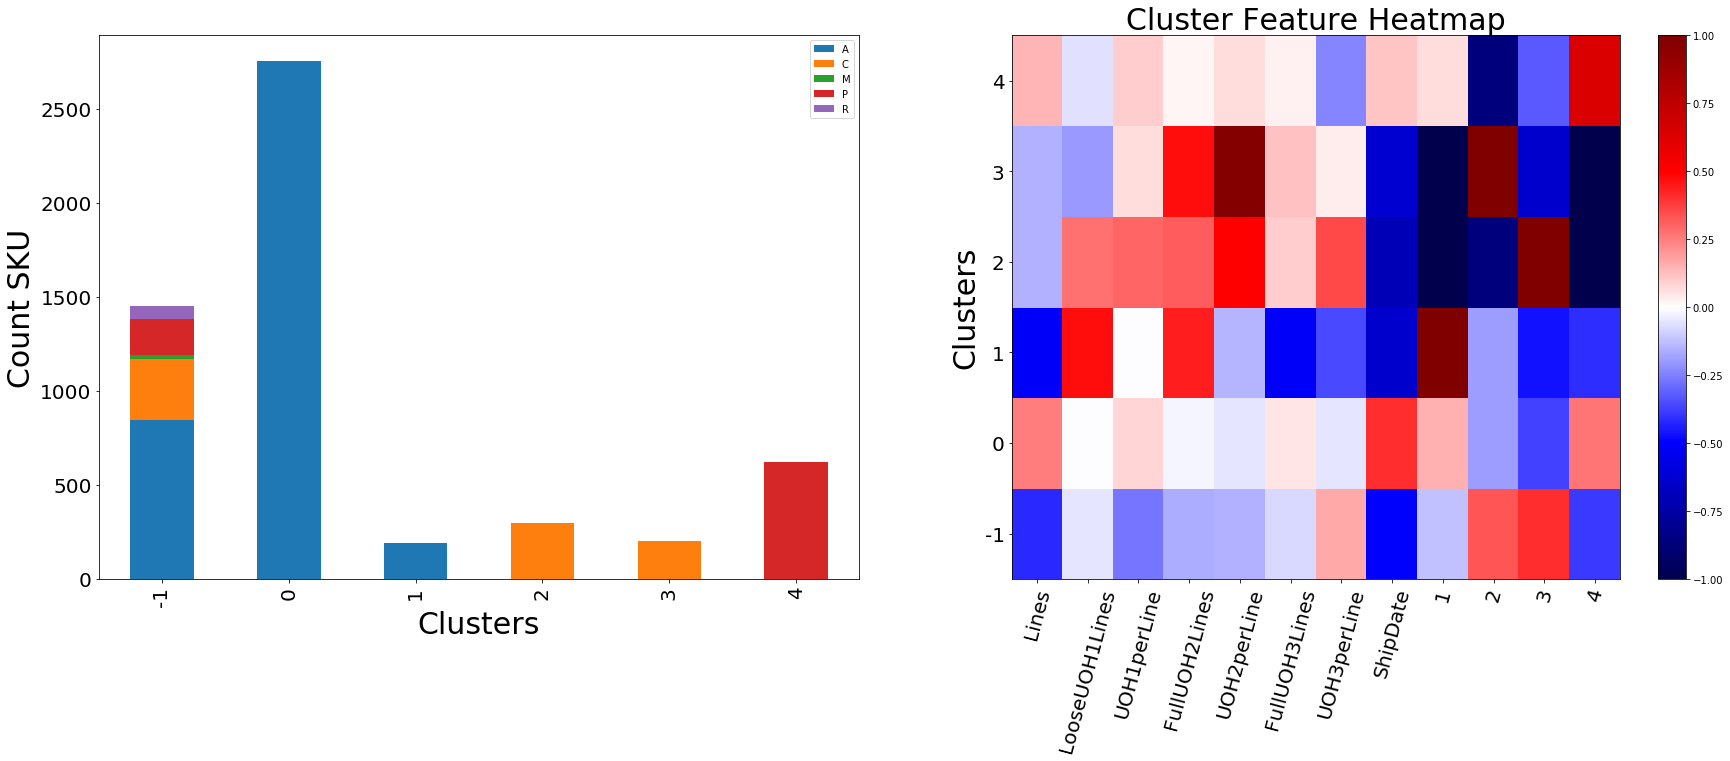

In [54]:
df.rename(columns = {'LooseUOH1sperLooseUOH1Lines': 'UOH1perLine','FullUOH2sperFullUOH2Lines': 'UOH2perLine', 'FullUOH3sperFullUOH3Lines': 'UOH3perLine' }, inplace = True)
headers = [ x for x in df.columns if x not in groupcols]
ylab = df.index.values
fig, (ax1, ax2)= plt.subplots(1, 2,  figsize = (30, 10))
#fig.subplots_adjust(bottom=0.25,left=0.25) # make room for labels
heatmap = ax2.pcolor(df[headers], cmap = 'seismic', vmin = -1, vmax = 1)
cbar = plt.colorbar(heatmap)

# Set ticks in center of cells
ax2.set_xticks(np.arange(len(headers)) + 0.5, minor=False)
ax2.set_yticks(np.arange(df.shape[0]) + 0.5, minor=False)

# Rotate the xlabels. Set both x and y labels to headers[1:]
ax2.tick_params('both', labelsize = 20)
ax2.set_xticklabels(headers,rotation=75)
ax2.set_yticklabels(ylab)
ax2.set_title('Cluster Feature Heatmap', fontsize = 30)
ax2.set_ylabel('Clusters', fontsize = 30)

df2.plot(kind = 'bar', stacked = True, ax = ax1)
ax1.set_xlabel('Clusters', fontsize = 30)
ax1.set_ylabel('Count SKU', fontsize = 30)
ax1.tick_params('both', labelsize = 20)
#plt.tight_layout()

In [41]:
df.columns

Index([                    'Lines',            'LooseUOH1Lines',
                     'UOH1perLine',             'FullUOH2Lines',
                     'UOH2perLine',             'FullUOH3Lines',
       'FullUOH3sperFullUOH3Lines',                  'ShipDate',
                               'A',                         'C',
                               'M',                         'P',
                               'R',                           1,
                                 2,                           3,
                                 4],
      dtype='object')

In [ ]:
df

In [57]:
df2.loc[-1:]

,A,C,M,P,R
clust,,,,,
-1,847.0,321.0,22.0,191.0,70.0
0,2754.0,0.0,0.0,0.0,0.0
1,192.0,0.0,0.0,0.0,0.0
2,0.0,295.0,0.0,0.0,0.0
3,0.0,203.0,0.0,0.0,0.0
4,0.0,0.0,0.0,622.0,0.0
